In [1]:
# Import libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Download stock data
ticker = 'AMD'
start_date = '2015-01-01'
end_date = '2023-01-01'
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Explore the data
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,2.67,2.67,2.67,2.67,2.67,0
2015-01-05,2.67,2.70,2.64,2.66,2.66,8878200
2015-01-06,2.65,2.66,2.55,2.63,2.63,13912500
2015-01-07,2.63,2.65,2.54,2.58,2.58,12377600
2015-01-08,2.59,2.65,2.56,2.61,2.61,11136600


In [3]:

stock_data.index = pd.to_datetime(stock_data.index)


# Ensure proper frequency and fill missing dates
all_dates = pd.date_range(start=stock_data.index.min(), end=stock_data.index.max(), freq='B')
stock_data = stock_data.reindex(all_dates).ffill()  # Reindex and forward fill


# Explicitly set frequency
stock_data.index.freq = pd.tseries.frequencies.to_offset('B')  # Set frequency to business day

stock_data.index.names=['Date']

# Explore the data
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,2.67,2.67,2.67,2.67,2.67,0.0
2015-01-05,2.67,2.70,2.64,2.66,2.66,8878200.0
2015-01-06,2.65,2.66,2.55,2.63,2.63,13912500.0
2015-01-07,2.63,2.65,2.54,2.58,2.58,12377600.0
2015-01-08,2.59,2.65,2.56,2.61,2.61,11136600.0


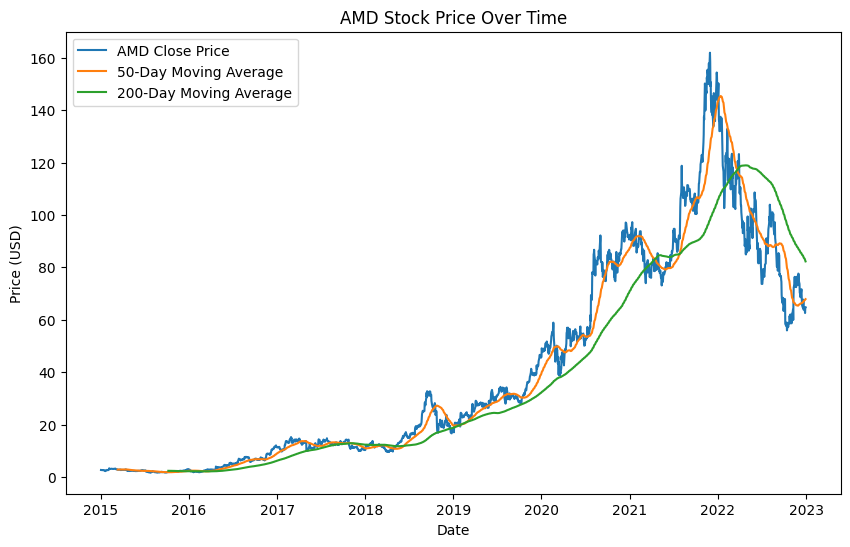

In [4]:
# Add moving averages (short = 50 days, long = 200 days)
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA_200'] = stock_data['Close'].rolling(window=200).mean()

# Visualize stock price trends
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label=f'{ticker} Close Price')
plt.plot(stock_data['MA_50'], label='50-Day Moving Average')
plt.plot(stock_data['MA_200'], label='200-Day Moving Average')
plt.title(f'{ticker} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()



# Save preprocessed data
stock_data.to_csv('../data/preprocessed_stock_data.csv')

In [5]:
print(stock_data['Close'])

Date
2015-01-02     2.670000
2015-01-05     2.660000
2015-01-06     2.630000
2015-01-07     2.580000
2015-01-08     2.610000
                ...    
2022-12-26    64.519997
2022-12-27    63.270000
2022-12-28    62.570000
2022-12-29    64.820000
2022-12-30    64.769997
Freq: B, Name: Close, Length: 2086, dtype: float64
